#### Importing Libraries

In [81]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

 #Adjusts the configuration of the plots that we create
    
matplotlib.rcParams['figure.figsize'] = (12,8) 

#### Reading the Dataset

In [82]:
df = pd.read_csv(r'C:\Users\Jhanvi.Kasundra\OneDrive - State of Kansas, OITS\Desktop\UPSKILLING\Untitled Folder\movies.csv')

#### Looking at the data 

In [83]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### Cleaning the data

In [84]:
##### checking if there is any missing data

In [85]:
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#### Looking at the data types

In [86]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

#### Changing data types of the columns

In [87]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

C:\Users\Jhanvi.Kasundra\AppData\Local\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [88]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [89]:
df[['released', 'Location']] = df['released'].str.split('(', expand=True)

In [90]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States)


In [91]:
df['yearupdated']=df['released'].astype(str).str[-5:]

In [92]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States),1980


In [93]:
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [94]:
pd.set_option('display.max_rows',None)

#### Drop any duplicates

In [95]:
df['company'] = df['company'].drop_duplicates().sort_values(ascending=False)
#df.drop_duplicates()

In [96]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States),2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,United States),2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,United States),2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,NaN,143.0,United States),2012


### Comparing the budget to gross revenue using a scatter plot

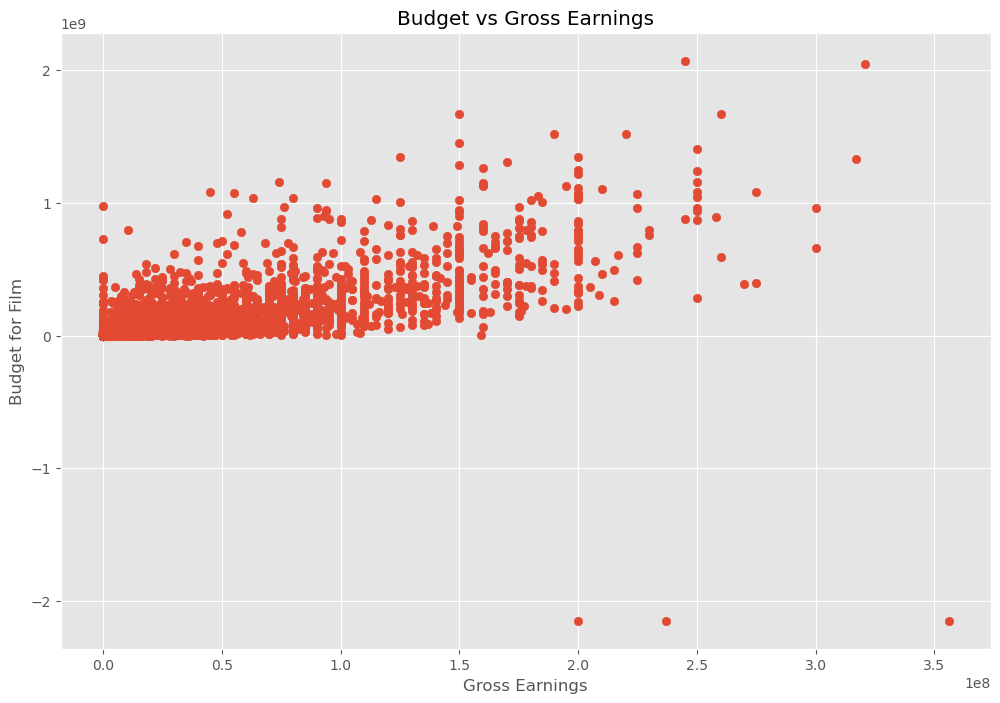

In [98]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

#### plot the budget vs gross using Seaborn

<Axes: xlabel='budget', ylabel='gross'>

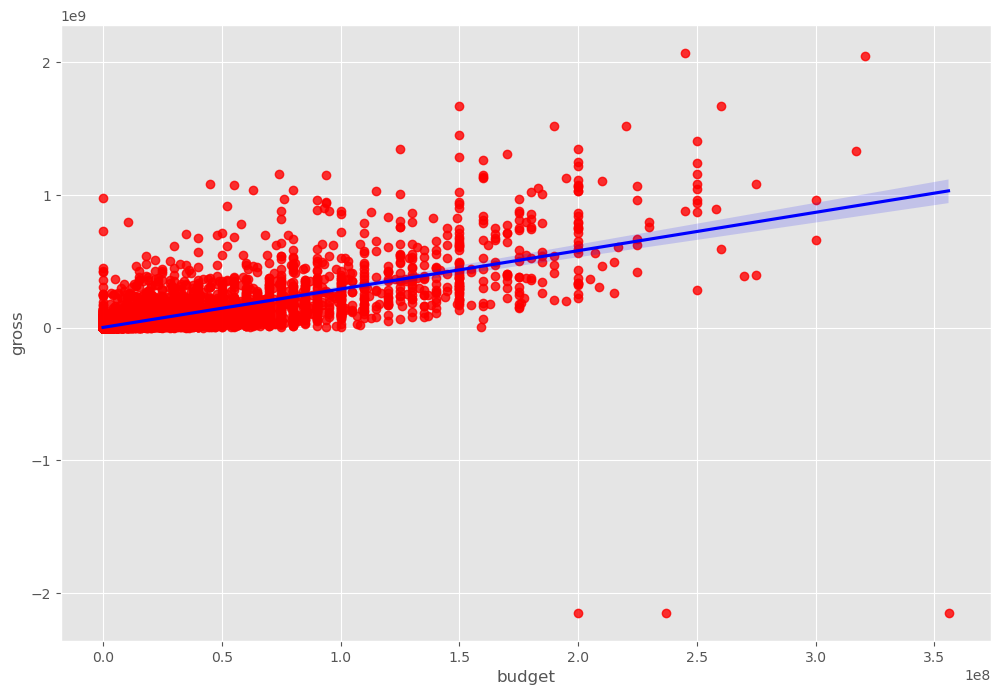

In [99]:
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color":"red"}, line_kws={"color":"blue"})

#### Lets start looking at correlation

In [100]:
df.corr(method = 'pearson') #pearson, kendall, sprearman

C:\Users\Jhanvi.Kasundra\AppData\Local\Temp\ipykernel_20780\2793902044.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson') #pearson, kendall, sprearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


In [101]:
df.corr(method = 'kendall') #pearson, kendall, sprearman

C:\Users\Jhanvi.Kasundra\AppData\Local\Temp\ipykernel_20780\3523866011.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'kendall') #pearson, kendall, sprearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.215943,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.089155,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.558565,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.540326,0.176016
gross,0.215943,0.089155,0.558565,0.540326,1.000000,0.175355
runtime,0.097184,0.283611,0.198240,0.176016,0.175355,1.000000


In [102]:
df.corr(method = 'spearman') #pearson, kendall, sprearman

C:\Users\Jhanvi.Kasundra\AppData\Local\Temp\ipykernel_20780\2292798264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman') #pearson, kendall, sprearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.313716,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.130397,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.749942,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.714457,0.246748
gross,0.313716,0.130397,0.749942,0.714457,1.000000,0.254471
runtime,0.142977,0.399857,0.290159,0.246748,0.254471,1.000000


High correlation between budget and gross

#### Correlation matrix

C:\Users\Jhanvi.Kasundra\AppData\Local\Temp\ipykernel_20780\869516287.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


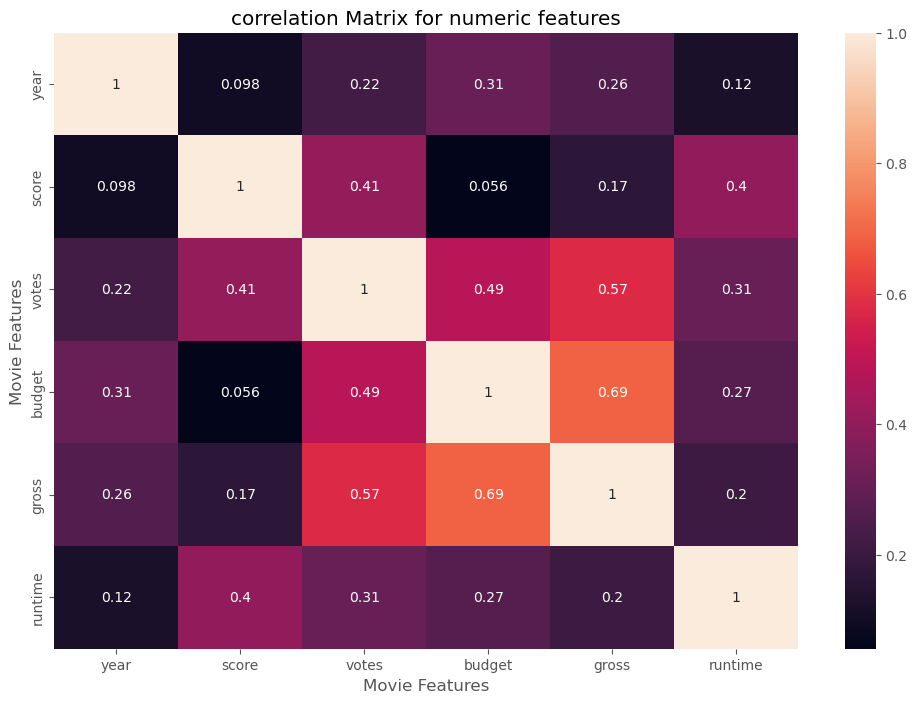

In [103]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [106]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States),2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,United States),2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,United States),2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,NaN,143.0,United States),2012


#### To convert company column to numeric so we can add it to correlation matrix

In [107]:
df_numerize = df

for col in df_numerize.columns:
    if(df_numerize[col].dtype == 'object'):
            df_numerize[col] = df_numerize[col].astype('category')
            df_numerize[col] = df_numerize[col].cat.codes
             
df_numerize.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
6663,5144,5,0,2015,612,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,56,35
7244,536,5,0,2018,161,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,56,38
7480,6194,4,2,2019,1307,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,56,39
6653,2969,5,0,2015,1509,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,56,35
6043,5502,5,0,2012,2170,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,-1,143.0,56,32


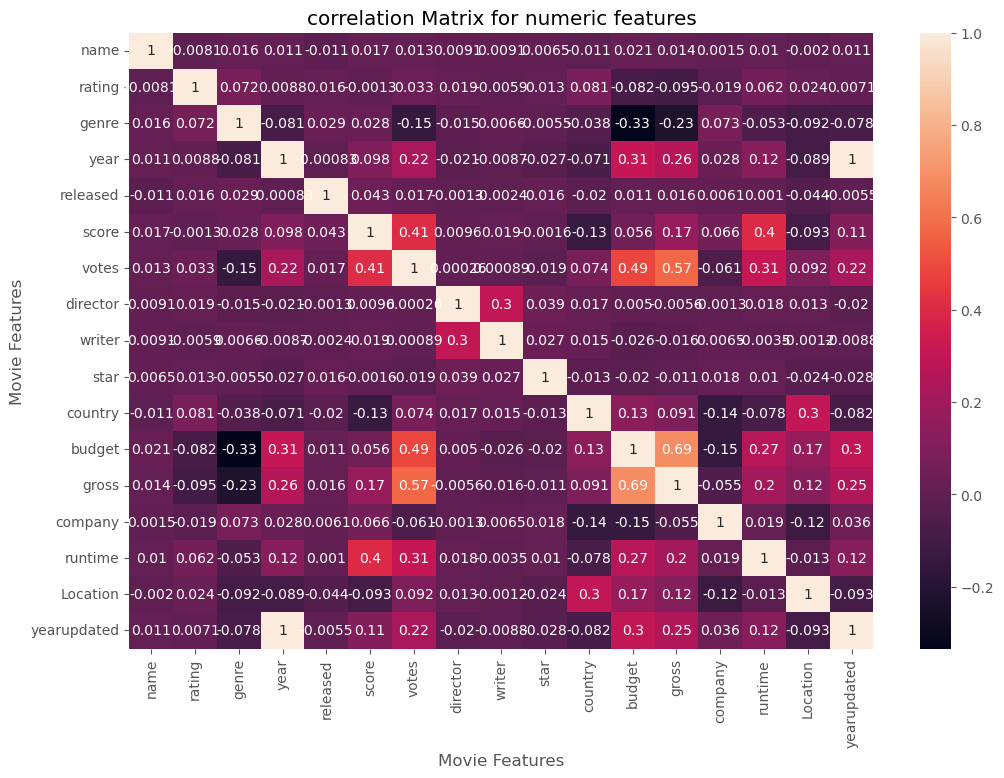

In [108]:
correlation_matrix = df_numerize.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [109]:
df_numerize.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
name,1.000000,-0.008069,0.016355,0.011453,-0.011223,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.001476,0.010392,-0.001968,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.015735,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.018840,0.062145,0.023977,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.029039,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,0.072981,-0.052711,-0.091572,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,-0.000832,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,0.028373,0.120811,-0.089289,0.997295
released,-0.011223,0.015735,0.029039,-0.000832,1.000000,0.042918,0.017111,-0.001275,-0.002421,0.015597,-0.020063,0.010643,0.015758,0.006120,0.000997,-0.043758,-0.005538
score,0.017097,-0.001314,0.027965,0.097995,0.042918,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.066224,0.399451,-0.092763,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.017111,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.573889,-0.061124,0.309212,0.092014,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,-0.001275,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,-0.001317,0.017624,0.013331,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002421,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.006514,-0.003511,-0.001201,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015597,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.017788,0.010174,-0.023540,-0.027576


#### Using unstacking to order the above correlations

In [110]:
corr_mat = df_numerize.corr()
corr_pairs = corr_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011223
dtype: float64

In [111]:
sort_pairs=corr_pairs.sort_values()
sort_pairs.head(10)

genre    budget    -0.334021
budget   genre     -0.334021
gross    genre     -0.229534
genre    gross     -0.229534
votes    genre     -0.145307
genre    votes     -0.145307
budget   company   -0.145170
company  budget    -0.145170
         country   -0.141403
country  company   -0.141403
dtype: float64

In [112]:
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr

gross        votes          0.573889
votes        gross          0.573889
budget       gross          0.687124
gross        budget         0.687124
year         yearupdated    0.997295
yearupdated  year           0.997295
name         name           1.000000
writer       writer         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
Location     Location       1.000000
yearupdated  yearupdated    1.000000
dtype: float64

#### Votes and budget have the highest correlation to the gross earnings 
Company has low correlation